In [6]:
import numpy as np
import matplotlib.pyplot as plt

#initialise variables
tMax = 650

# Load the CSV file
time_series_data = np.loadtxt("arma_time_series_Final.csv", delimiter=",")

print(time_series_data)
print(time_series_data.shape)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  6.19244566e-01
  5.83979360e-01  1.22020015e-01  1.09936119e-01  2.21892070e-01
 -1.76933084e-01 -3.08416480e-01 -5.65313590e-01 -8.12899023e-01
 -7.36498938e-01 -1.17073545e+00 -1.63752544e+00 -8.58401524e-01
 -1.02950962e+00 -9.74301199e-01 -8.82989999e-01 -1.03810027e+00
 -1.15936351e+00 -6.20735822e-01 -1.90358141e-01 -5.80448482e-01
 -3.36023929e-01 -1.04134839e+00 -1.86844930e+00 -2.21408396e+00
 -2.76332697e+00 -3.48865149e+00 -2.72735226e+00 -1.83137267e+00
 -1.64514504e+00 -1.98970582e+00 -1.55191830e+00 -1.47980634e+00
 -1.82642919e+00 -1.59539050e+00 -2.36049074e-01  4.36539251e-01
  3.70670276e-01  2.60586710e-01  6.39360847e-01  5.37024377e-01
  5.61149654e-01  7.48019858e-01  9.15942940e-01  1.62178189e+00
  2.57492341e+00  2.74002514e+00  2.98443578e+00  3.29010569e+00
  3.18008118e+00  2.25994902e+00  8.91572976e-01 -1.26897267e-01
  2.65424542e-01  2.08031686e-01  3.77485614e-01 -8.64822656e-02
 -7.85969897e-01 -3.16712

In [7]:
#Reshape array for normalisation and to create model-fit
xArray = np.array(time_series_data)
x1 = xArray.reshape(600,1)
print(x1.shape)
len(x1)

(600, 1)


600

In [8]:
#Assigning 500 values of matrix x1 to numsArray
numsArray = x1[99:(tMax-51)]

#printing shape to see if the desired matrix has been achieved
print("The shape of numsArray:",numsArray.shape, "\n")

#copying values to normArray
normArray = numsArray

# finding the minimum value of normArray
ymin = np.min(normArray)
print("Minimum value:",ymin,"\n")

# finding the maximum value of normArray
ymax = np.max(normArray) 
print("Maximum value:",ymax,"\n")


#Normalisation using min-max
numsArray = 2.0*((normArray-ymin)/(ymax-ymin)-0.5)
b = max(numsArray)
print("b:\n",b)

#GENERATING LAGS

#transforming the matrix to generate lags in the dataset
lagArray = numsArray.reshape(-1,1)

#input dimension/window size for which-- 
#--one-step ahead prediction needs to be done on dataset
inputDim = 10

#output dimension
outputDim = len(lagArray) - inputDim 
#print("The value of outputDim:",outputDim,"\n")

#intitialising x1 matrix to zeros
x1 = np.zeros((outputDim,inputDim))

#intitialising y1 to zero
y1 = np.zeros(outputDim)

#for-loop to find x1 and y1 values according to input dimension
#to enable one step ahead prediction
for i in range(1, outputDim):
    
    y1[i] = lagArray[i + inputDim]
        
    for j in range(0,inputDim):
        x1[i, j] = lagArray[i-j+inputDim]
    #print(round(y1[i],5))
    
#Choosing the x1 and y1 values that fit perfectly
y1 = y1[2:(outputDim)]
x1 = x1[1:(outputDim-1)]

print("The length of the array x1:",x1.shape,"\n")
print("Length of the array y1:",y1.shape,"\n")

The shape of numsArray: (500, 1) 

Minimum value: -3.4027688567187244 

Maximum value: 3.9018287617942895 

b:
 [1.]
The length of the array x1: (488, 10) 

Length of the array y1: (488,) 



In [12]:
#SPLIT THE DATA INTO TRAIN AND TEST DATA

# print the length of array x1
print("Print the length of x1:", len(x1))

#TRAINING DATA
# initialize arrays x and y
x = x1[0:(outputDim-100), 0:10]
y = y1[0:(outputDim-100)]

# print the shape of array y
print("Print the shape of y:", y.shape)

#TEST DATA
# initialize array t
t = x1[391:(outputDim-2), 0:10]

# initialize array test-set
y_test = y1[(outputDim-99):outputDim]

# print the length of arrays x and t
print("The length of x:", len(x), "\nThe length of t:", len(t))

# transpose the array x to create the array newArray
newArray = np.transpose(x)

# print the shape of newArray and arrays x and y
print("The shape of newArray:", newArray.shape)
print("\nThe shape of x:", x.shape)
print("\nThe shape of y:", y.shape)

#assign y values to variable targets
targets = y

#print the shape of newArray
print('targets shape:', targets.shape)

#initialize variables NHIDDENS and outputVal
NHIDDENS = 5
outputVal = targets

#initialize variables NINPUTS and NPATS
NINPUTS, NPATS = newArray.shape

#print the values of variables NINPUTS and NPATS
print("Value of NINPUTS:", NINPUTS, "\nValue of NPATS:", NPATS)

#initialize variables NP and NOUTPUTS
NP = targets.shape[0]
NOUTPUTS = targets.shape[0]/NP

#print the values of variables NP and NOUTPUTS
print("Value of NP:", NP, "\nValue of NOUTPUTS:", NOUTPUTS)


Print the length of x1: 488
Print the shape of y: (390,)
The length of x: 390 
The length of t: 97
The shape of newArray: (10, 390)

The shape of x: (390, 10)

The shape of y: (390,)
targets shape: (390,)
Value of NINPUTS: 10 
Value of NPATS: 390
Value of NP: 390 
Value of NOUTPUTS: 1.0


The shape of input matrix: (11, 390)
Test runs 0: Epoch 0: Error = 70.18901034778898
Test runs 0: Epoch 1: Error = 62.84332386983326
Test runs 0: Epoch 2: Error = 56.96646528797976
Test runs 0: Epoch 3: Error = 52.04185825724947
Test runs 0: Epoch 4: Error = 47.825475962278674
Test runs 0: Epoch 5: Error = 44.192560606035826
Test runs 0: Epoch 6: Error = 41.06846649751031
Test runs 0: Epoch 7: Error = 38.395399960225134
Test runs 0: Epoch 8: Error = 36.11811850953523
Test runs 0: Epoch 9: Error = 34.18017722648474
Test runs 0: Epoch 10: Error = 32.525336389485304
Test runs 0: Epoch 11: Error = 31.10060117036057
Test runs 0: Epoch 12: Error = 29.858903599807824
Test runs 0: Epoch 13: Error = 28.760630382593078
Test runs 0: Epoch 14: Error = 27.77395635841837
Test runs 0: Epoch 15: Error = 26.874297866652256
Test runs 0: Epoch 16: Error = 26.043276690111078
Test runs 0: Epoch 17: Error = 25.26751811676742
Test runs 0: Epoch 18: Error = 24.53749499054257
Test runs 0: Epoch 19: Error = 23.

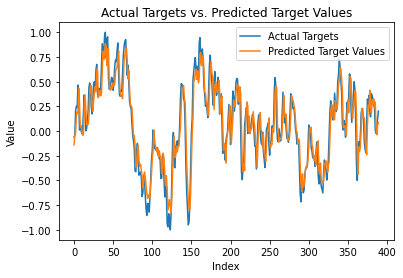

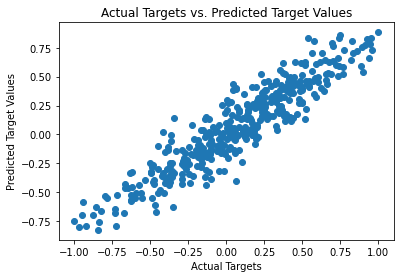

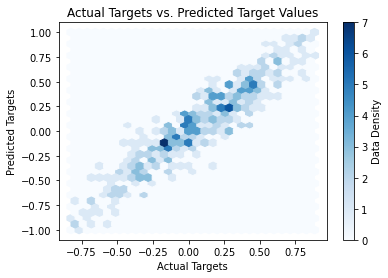

In [15]:
eta = 0.001
#target error
L = 0.02

# set the number of epochs
epochs = 100


# initialize the best SSE to infinity
best_sse = np.inf

#make input matrix
inputs = np.concatenate((newArray, np.ones((1, NPATS))), axis=0)
print("The shape of input matrix:", inputs.shape)

for i in range (1):
    
    #using the random seed function
    #find best weights corresponding to each test run
    np.random.seed(10)
    
    #weight matrix w1 & w2
    w1 = 0.5 * (np.random.rand(NHIDDENS, NINPUTS+1) - 0.5)
    w2 = 0.5 * (np.random.rand(1, NHIDDENS+1) - 0.5) 
     
          
    for epoch in range(epochs):
        
        w1_copy = np.copy(w1)
        w2_copy = np.copy(w2)
        
        # Forward propagation
        sum1 = np.matmul(w1_copy, inputs) 
        
        #finding hidden node value by calculating tanh of the output
        hidden = np.tanh(sum1)
        
        #calculating dot product and output node
        #adding a bias term to the hidden node using concatenate before using dot product
        sum2 = np.dot(w2_copy, np.concatenate((hidden, np.ones((1, NPATS))), axis=0))
        
        #assigning vlaues to variables to use later
        out = sum2 
        outputVal = out
        
        #Backpropagation of errors
        error = targets - out 
        sse = np.sum(np.sum((error**2)))
        bout = error 
        bp = np.dot(w2.T, bout) 
        bh = np.multiply((1.0 - np.power(hidden, 2)), bp[:-1, :])
        
        # Computing the change in weights:
        dW2 = np.dot(bout, np.concatenate((hidden, np.ones((1, NPATS))), axis=0).T)
        dW1 = np.dot(bh, inputs.T)
            
        # Updating the weights:
        w2 = w2_copy + eta*dW2
        w1 = w1_copy + eta*dW1
        
        #store the best sse to find the best weights 
        if sse < best_sse:
            best_sse = sse
            best_weights = (w1_copy, w2_copy)
            
    #print the SSE for this test run
        print(f'Test runs {i}: Epoch {epoch}: Error = {sse}')
    
    
print("\n\n",f'Best SSE = {best_sse}',"\n")
print(f'Best weights:',"\n")
print(f'w1 = {best_weights[0]}',"\n\n")
print(f'w2 = {best_weights[1]}')
print("The shape of W1 weight matrix:", w1.shape)
print("The shape of W2 weight matrix:", w2.shape)


# Forward propagation using the best weights
#sum1_best = np.matmul(w1, inputs)
#hidden_best = np.tanh(sum1_best)
#sum2_best = np.dot(w2, np.concatenate((hidden_best, np.ones((1, NPATS))), axis=0))
predictions = outputVal


# Flatten the predictions array to 1D to plot using Matplotlib
flat_predictions = predictions.ravel()

# Create a line plot for both actual targets and predicted targets
plt.plot(targets, label='Actual Targets')
plt.plot(flat_predictions, label='Predicted Target Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual Targets vs. Predicted Target Values')
plt.legend()
plt.show()

#Scatter Plot
plt.title('Actual Targets vs. Predicted Target Values')
plt.scatter(targets, flat_predictions)
plt.xlabel('Actual Targets')
plt.ylabel('Predicted Target Values')
plt.show()

# Create a hexbin plot
plt.hexbin(flat_predictions, targets, gridsize=30, cmap='Blues')
plt.xlabel('Actual Targets')
plt.ylabel('Predicted Targets')
plt.title('Actual Targets vs. Predicted Target Values')
plt.colorbar(label='Data Density')
plt.show()


(11, 97)
(5, 97)
(1, 97)
Shape of outputVal: (1, 97)
Shape of predictions: (97,)


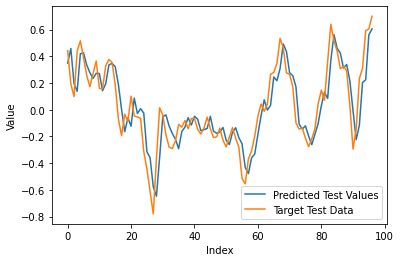

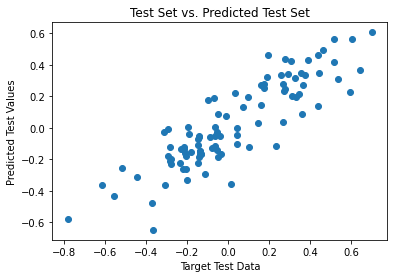

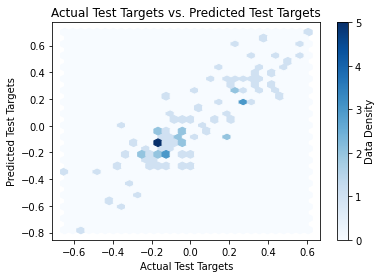

In [16]:
#Forecast the data

testinputs = np.concatenate((t.T, np.ones((1, t.shape[0]))), axis=0)
print(testinputs.shape)
sum1 = np.matmul(w1, testinputs) 
print(sum1.shape)
hidden = np.tanh(sum1)
sum2 = np.dot(w2, np.concatenate((hidden, np.ones((1, t.shape[0]))), axis=0))
print(sum2.shape)
out = sum2 
outputVal = out
print("Shape of outputVal:",outputVal.shape)

#Flatten outputVal dataset to 1DArray to visualize the data
predictions = outputVal.ravel()
print("Shape of predictions:",predictions.shape)

#Plot graph
plt.plot(range(len(predictions)), predictions, label='Predicted Test Values')
plt.plot(range(len(y_test)), y_test, label='Target Test Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

#Scatter Plot
plt.title('Test Set vs. Predicted Test Set')
plt.scatter(y_test, predictions)
plt.xlabel('Target Test Data')
plt.ylabel('Predicted Test Values')
plt.show()


# Create a hexbin plot
plt.hexbin(predictions, y_test, gridsize=30, cmap='Blues')
plt.xlabel('Actual Test Targets')
plt.ylabel('Predicted Test Targets')
plt.title('Actual Test Targets vs. Predicted Test Targets')
plt.colorbar(label='Data Density')
plt.show()
